# **Simularea variabilelor aleatoare**

**Ex. 1.** Scrieţi un program în Python care să preia ca input un fişier .csv cu o listă oarecare şi să aibă ca output un număr
predeterminat de elemente din acea listă, fără repetiţie. Aplicaţi pe lista studenţilor din grupa dumneavoastră care nu
au prezentat încă o temă.

Notă: Pentru generarea unui eşantion aleator se poate apela funcţia sample din modulul random sau funcţia random.choice cu argumentul replace=False din librăria Numpy.


In [68]:
import numpy as np
import random
import pandas as pd

#Citesc fisierul CSV
students = pd.read_csv('/teme-pmp.csv')

#Afisare pt verificare
print(students.to_string(index=False))

#Parametrii reali
chosen_students=4;

#Esantion random de 4 studenti
index_students = np.random.choice(students.index, size=chosen_students, replace=False);

#Extragem datele despre studentii selectati
selected_students = students.iloc[index_students]

print("\nEsantionul aleator de studenti este:")

#Afisare studenti "nume-prenume"
for index, row in selected_students.iterrows():
  print(row.iloc[0],row.iloc[1])

Romanescu       Adia
    Ladaru     Eliza
Grumazescu    George
    Jiglau   Gabriel
      Rata    Ovidiu
      Popa    Cosmin
   Pricop      Tudor
  Rogojina     Mihai
   Aioanei     Elena
     Arama Alexandru
 Cojocariu Anastasia
    Buzdea    Stefan
   Dominte   Emanuel
    Mazare    Bianca
Hudisteanu   Mihaela
   Negoita     Mihai
    Moglan   Andreea
      Radu    Roxana
     Vieru    Raluca

Esantionul aleator de studenti este:
Cojocariu Anastasia
Vieru Raluca
Hudisteanu Mihaela
Ladaru Eliza


**Ex. 2.** Doi prieteni joacă următorul joc, după următoarele reguli:

**Pasul 1. Primul jucător aruncă cu o monedă.**

*   Dacă pică stemă, cel de-al doilea trebuie să arunce cu zarul şi să-i dea primului o sumă egală z-3 `$`, unde z
este rezultatul aruncării cu zarul (a da o sumă negativă este echivalent cu a lua opusul acelei sume). Jocul
se încheie aici.
*   Dacă pică ban, atunci primul jucător trebuie să-i dea celui de-al doilea 0.5 `$`.


**Pasul n. În caz că jocul nu s-a încheiat, se reia pasul 1.**

  Astfel, jocul se opreşte la pasul corespunzător obţinerii stemei de către primul jucător.

  **a)** Ce fel de distribuţie urmează N, numărul de paşi ai jocului?
  
  **b)** Simulaţi în Python un astfel de joc. Variabilele care ne interesează sunt N şi suma totală S pe care cel de-al
doilea jucător trebuie să i-o dea primului.
  
  **c)** Prin simularea unui număr mare de astfel de jocuri, determinaţi cu aproximaţie media lui S şi reprezentaţi grafic
(printr-o histogramă) distribuţia acesteia.
  
  **d)** Ce se întâmplă dacă moneda este măsluită? Încercaţi să refaceţi pct. c) cu o probabilitate de apariţie a stemei
p = 0.3, respectiv p = 0.7.

---
**a)** Distributia urmata de N (numarul de pasi ai jocului) este una **geometrica**, deoarece aceasta modeleaza numarul de incercari pana la primul succes intr-o serie de experimente Bernoulli independente, experimente care au doua rezultate posibile: succes sau esec. In acest context, succesul (cu probabilitatea p = 0.5) este definit ca aparitia **stemei** la aruncarea unei monede. Jocul se incheie atunci cand primul jucator obtine pentru prima data **stema**.

Astfel, N reprezinta numarul de aruncari necesare pana la prima aparitie a stemei (considerata succes), ceea ce determina finalul jocului.


---

In [69]:
#b)
import random

def simulation_game():
  n = 0  #nr de pasi = aruncari de moneda
  s = 0  #suma totala pe care jucatorul 2 trebuie sa o dea primului

  while True:
    player1 = random.randint(0, 1)  #jucatorul 1 arunca moneda [0 = ban, 1 = stema]

    if player1 == 0:  #pica ban
        n += 1
        s -= 0.5  #jucatorului 2 primeste 0.5$ de la jucatorul 1

    else:  #pica stema
        n += 1  #ultima aruncare
        player2 = random.randint(1, 6) #jucatorul 2 arunca zarul

        if player2 >= 3:
            s += (player2 - 3) #suma pozitiva (jucatorul 2 plateste)
        else:
            s -= (3 - player2) #suma negativa (jucatorul 2 primeste)
        break  #jocul se incheie aici

  return n, s

n, s = simulation_game()
#Afisez rezultatul
print(f"Numarul de pasi N = {n}")
print(f"Suma totala S = {s} $")

Numarul de pasi N = 1
Suma totala S = 0 $


Suma medie S = -0.01 $


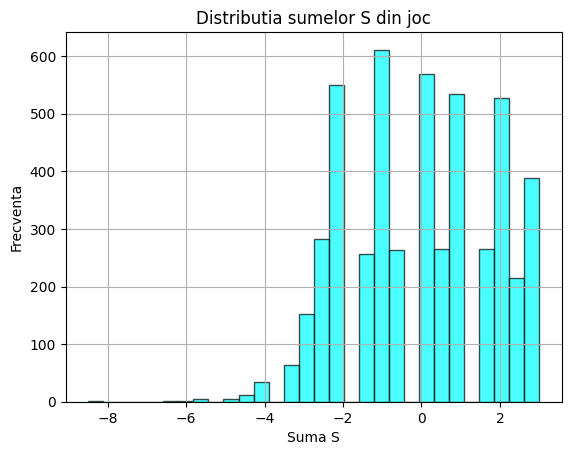

In [70]:
#c)
import numpy as np
import matplotlib.pyplot as plt

#Simulez un nr mare de jocuri
num_games = 5000
sums = []

for _ in range(num_games):
    steps, game_sum = simulation_game()
    sums.append(game_sum)

#Calculez media sumelor
average_sum = np.mean(sums)

#Afisez rezultatul mediu
print(f"Suma medie S = {average_sum:.2f} $")

#Histograma
plt.hist(sums, bins=30, color='cyan', edgecolor='black', alpha=0.7)
plt.title('Distributia sumelor S din joc')
plt.xlabel('Suma S')
plt.ylabel('Frecventa')
plt.grid(True)
plt.show()

Suma medie S (p = 0.3) = -0.67 $
Suma medie S (p = 0.7) = 0.31 $


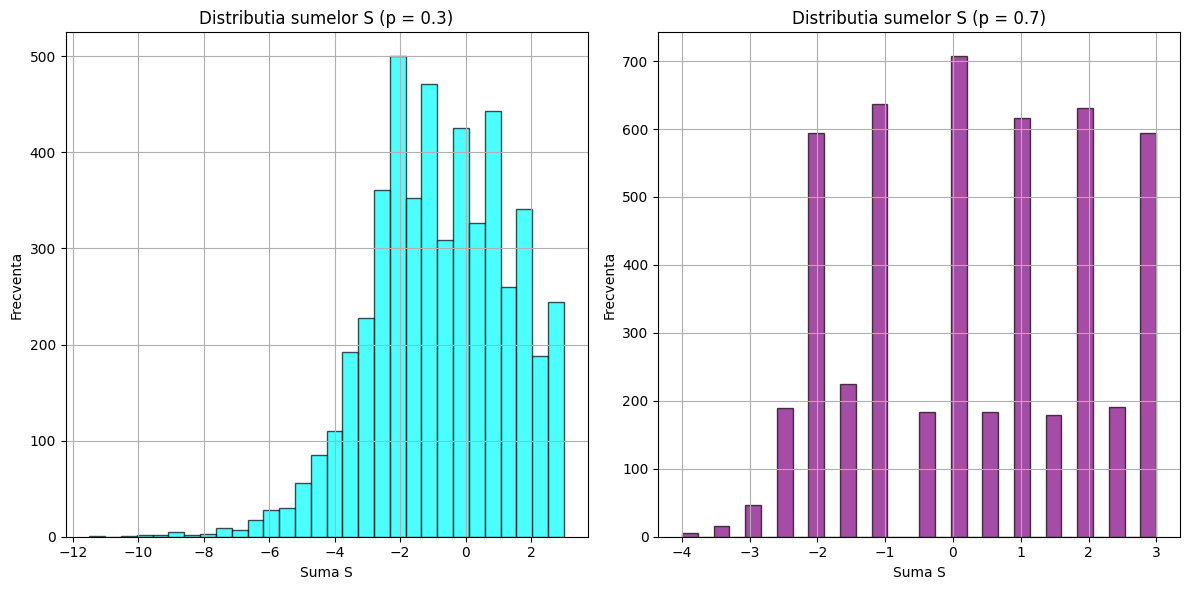

In [71]:
#d)
import random
import numpy as np
import matplotlib.pyplot as plt

def simulation_game(prob_stema):
    n = 0
    s = 0

    while True:
        player1 = np.random.choice([0, 1], p=[1 - prob_stema, prob_stema])  #jucatorul 1 arunca moneda cu prob specificata

        if player1 == 0:  #pica ban
            n += 1
            s -= 0.5  #jucatorului 2 primeste 0.5$ de la jucatorul 1

        else:  #pica stema
            n += 1  #ultima aruncare
            player2 = random.randint(1, 6)  #jucatorul 2 arunca zarul

            if player2 >= 4:
                s += (player2 - 3)  #suma pozitiva (jucatorul 2 plateste)
            else:
                s -= (3 - player2)  #suma negativa (jucatorul 2 primeste)
            break  #jocul se incheie aici

    return n, s

#Simulez un nr mare de jocuri pt cele 2 prob
num_games = 5000
sums3 = []
sums7 = []

#Simularea pentru p = 0.3
for _ in range(num_games):
    _, game_sum = simulation_game(prob_stema=0.3)
    sums3.append(game_sum)

#Simularea pentru p = 0.7
for _ in range(num_games):
    _, game_sum = simulation_game(prob_stema=0.7)
    sums7.append(game_sum)

#Media sumelor
average_sum3 = np.mean(sums3)
average_sum7 = np.mean(sums7)

#Afisare rezultate medii
print(f"Suma medie S (p = 0.3) = {average_sum3:.2f} $")
print(f"Suma medie S (p = 0.7) = {average_sum7:.2f} $")

#Histograma pt p = 0.3
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(sums3, bins=30, color='cyan', edgecolor='black', alpha=0.7)
plt.title('Distributia sumelor S (p = 0.3)')
plt.xlabel('Suma S')
plt.ylabel('Frecventa')
plt.grid(True)

#Histogram pt p = 0.7
plt.subplot(1, 2, 2)
plt.hist(sums7, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distributia sumelor S (p = 0.7)')
plt.xlabel('Suma S')
plt.ylabel('Frecventa')
plt.grid(True)

plt.tight_layout()
plt.show()


**Ex. 3.** Într-o frizerie, trei frizeri îşi tund clienţii cu următoarele viteze medii: primul cu 3 clienţi pe oră, al doilea cu 6 pe
oră iar al treilea cu 4 pe oră.

Astfel, timpul de servire al unui client este modelat de distribuţii exponenţiale cu parametrii
λ1 = 3h-1, λ2 = 6h-1, respectiv λ3 = 4h-1, iar probabilităţile de preluare a unui client de către un anumit frizer sunt 3/13, 6/13, respectiv 4/13 (de ce?). Fie X timpul de servire pentru un client.


Generaţi 10000 de valori pentru X, şi în felul acesta estimaţi media şi deviaţia standard a lui X. Realizaţi un grafic
aproximativ al densităţii distribuţiei lui X.


Notă: Distribuţia Exp(λ) se poate apela prin random.exponential(scale=1/λ) în Numpy, sau cu stats.expon(scale=1/λ)
în Scipy. Având în vedere că X are o distribuţie continuă, densitatea aproximativă acesteia se poate vizualiza folosind
funcţia plot_kde din librăria Arviz.

Distribuţii exponenţiale pentru modelarea timpului de servire al unui client:
*   λ1 = 3h^-1 (3 clienti pe ora)
*   λ2 = 6h^-1 (6 clienti pe ora)
*   λ3 = 4h^-1 (4 clienti pe ora)

Probabilităţile de preluare a unui client de către un anumit frizer sunt
* Frizer1: P1=3/(3+6+4)=3/13
* Frizer2: P2=6/(3+6+4)=6/13
* Frizer3: P3=4/(3+6+4)=4/13


Media timpului de servire: 0.2349 ore
Deviatia standard a timpului de servire: 0.2525 ore


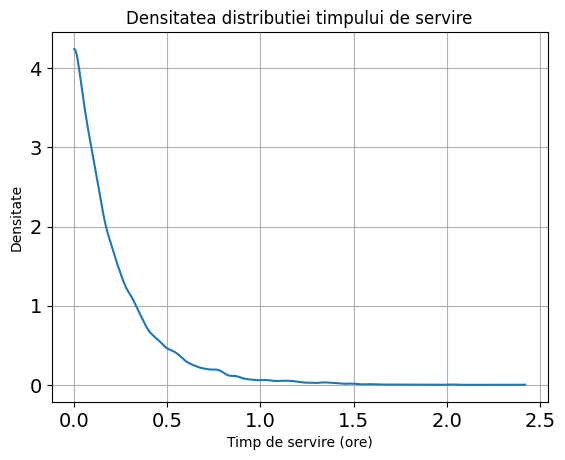

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

#Seed pentru reproducibilitate
np.random.seed(42)

#Parametrii
lambdas = [3, 6, 4]  # λ1, λ2, λ3
probabilities = [3/13, 6/13, 4/13]  # probabilitatile frizerilor

#Generare 10000 clienti
number_clients = 10000
clients = np.random.choice([1, 2, 3], size=number_clients, p=probabilities)

#Array de dimensiunea 10.000 in care vor fi salvati timpii de servire pentru fiecare client
serving_times = np.zeros(number_clients)
for i in range(number_clients):
    if clients[i] == 1:
        serving_times[i] = np.random.exponential(scale=1/lambdas[0])  #Frizer1
    elif clients[i] == 2:
        serving_times[i] = np.random.exponential(scale=1/lambdas[1])  #Frizer2
    else:
        serving_times[i] = np.random.exponential(scale=1/lambdas[2])  #Frizer3

#Media si deviatia standard
mean_time = np.mean(serving_times)
std_dev_time = np.std(serving_times)

#Rezultate
print(f"Media timpului de servire: {mean_time:.4f} ore")
print(f"Deviatia standard a timpului de servire: {std_dev_time:.4f} ore")

#Graficul densitatii distributiei lui X
az.plot_kde(serving_times)
plt.title('Densitatea distributiei timpului de servire')
plt.xlabel('Timp de servire (ore)')
plt.ylabel('Densitate')
plt.grid(True)
plt.show()
